# Investigation of No-Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset under investigation is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Various characteristics about the patient are included such as Gender and Age as well as each individual's primary health designation(s) such as Hypertension, Alcoholism, and Diabetes. Six months of appointment data are assessed below.

Questions to be investigated:
* What is the patient age distribution of no-shows versus shows?
* What is the patient health designation breakdown of no-shows versus shows?
* Which neighborhoods have the highest number of no-shows?
* What is the breakdown of no-shows versus shows by patients that received SMS reminders?
* Do no-shows have a larger timeframe between schedule date and appointment date?
* Do appointment no-shows occur on specific days of the week?
* Are there any trends in appointment no-shows versus shows over time?

<a id='methodology'></a>
## Methodology

The general methodology followed to perform the investigation:

 - Data Wrangling. Moving raw data into dataframes for manipulation.
 - Data Cleaning. Transforming data to uniform format.
 - Data Analysis. Exploring data and patterns.
 - Data Visualization. Visualizing and drawing conclusions.

# The Investigation

<a id='wrangling'></a>
## Data Wrangling

#### Step 1: Import data analysis packages

This investigation makes uses of the following data analytics packages:
 - Pandas. Provides flexible data structures designed to make working with “relational” or “labeled” data intuitive.
 - Numpy. Provides functions to create and manipulate numerical data with speed.
 - Matplotlib. Provide publication quality figures in a variety of formats with just a few lines of code.

In [49]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
% matplotlib inline

#### Step 2: Load data into the Jupyter notebook

In [50]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

#### Step 3: Integrity check to see if there is any naming or data type inconsistency in the dataset

In [51]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Observations / Changes Needed**: 
 - Changing column case and using underscores will make columns easier to read and work with
 - Changing column mispellings will make columns easier to read and work with

#### Step 4: Integrity check to see if there is any NULL data in the dataset

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Observations / Changes Needed**: 
 - Changing patientID data type from float to int will make the dataset easier to work with
 - Stripping time from the schedule_day column will make the dataset easier to work with
 - Stripping time from the appointment_day column will make the dataset easier to work with

#### Step 5: Integrity check to see if there is any duplicate data in the dataset

In [53]:
print(sum(df.duplicated()))

0


> **Observations / Changes Needed**:
 - No duplicate data exists.

#### Step 6: Integrity check to see if there is any "bad" data in the dataset, i.e. data entry issues

In [54]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Observations / Changes Needed**:
 - Minimum Age appears as -1. Any such patient will be assumed to be a newborn or infant.

<a id='cleaning'></a>
## Data Cleaning

#### Step 1: Fixed column mispellings, incorporated underscores, and changed case
Making the data as easy as possible to work with by eliminating confusing inconsistencies

In [55]:
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels
df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


#### Step 2: Changed schedule_day column to datetime
Converting date field from string to datetime to easily perform time calculations

In [56]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null float64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


#### Step 3: Stripped time from schedule_day since it has no time-level data
Ignoring the time portion of schedule_day because no time data exists

In [57]:
df['schedule_day'] = df['schedule_day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null float64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Step 4: Changed appointment_day column to datetime
Converting date field from string to datetime to easily perform time calculations

In [58]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null float64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


#### Step 5: Stripped time from appointment_day since schedule_day has no time-level data
Ignoring the time portion of appointment_day to keep value uniform with schedule_day

In [59]:
df['appointment_day'] = df['appointment_day'].apply(lambda x: x.strftime('%m-%d-%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null float64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Step 6: Created a appointment_dow column for day of week analysis
Converting date fields from string to datetime, once again, to enable datetime functions, then converting date to day of week for report readability.

In [60]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df['schedule_dow'] = df['schedule_day'].dt.weekday_name
df['appointment_dow'] = df['appointment_day'].dt.weekday_name
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


#### Step 7: Changed patiendID data type from float to int
Converting patientID to int to remove scientific notation -- unnecessary format for representing an ID

In [61]:
df['patientID'] = df['patientID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
patientID          110527 non-null int64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
schedule_dow       110527 non-null object
appointment_dow    110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 13.5+ MB


#### Step 8: Transformed the data type of the no_show field to integer
Converting no_show field from string to int so it can be plotted in charts

In [62]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


<a id='eda'></a>
## Data Analysis

### _Dataframes for reuse throughout analyses_

#### Dataframe 1: Created a new column to store time between scheduling and appointment
Creating a derived column of time between schedule and appointment dates

In [63]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['elapsed_days'] = df['appointment_day'] - df['schedule_day']

#### Dataframe 2: Created a dataframe to hold all no-show records
Creating a reusable dataframe of all no-show records

In [64]:
no_shows = df.query('no_show == "1"')
days = no_shows['elapsed_days'].mean()
timeframe_nos = days / np.timedelta64(1, 'D')

#### Dataframe 3: Created a dataframe to hold all show records
Creating a reusable dataframe of all show records

In [65]:
shows = df.query('no_show == "0"')
days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')

#### Dataframe 4: Translated no-show data type from string to integer for plotting
Creating a dataframe with ready-to-plot data types

In [66]:
no_shows['no_show']='1'
no_shows['no_show'] = no_shows['no_show'].astype(int)
no_shows.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,elapsed_days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,Friday,3 days
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,Friday,1 days
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,Friday,2 days


### _Tables and Plots to Summarize Findings_

#### Question 1: What is the proportion of appointment shows versus no shows?
Understanding the magnitude of the no-show problem

In [67]:
new_df = df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "No Show"
new_df.iloc[1,0] = "Show"

In [68]:
nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

In [69]:
new_df['proportion'] = [nos_prop, shows_prop]
new_df.head()

,appt_status,total,proportion
0,No Show,88208,0.798067
1,Show,22319,0.201933


> **Figure:** Proportion of shows and no-shows

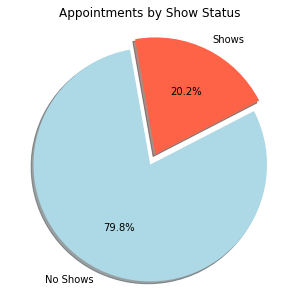

In [70]:
# Data to plot
labels = ['No Shows', 'Shows']
sizes = [nos_prop, shows_prop]
colors = ['lightblue', 'tomato']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Appointments by Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> Visual distribution of appointment show status

#### Question 2: What is the patient age distribution of no-shows versus shows?
Identifying potential influencers of appointment no-shows -- age

In [71]:
age_df_nos = no_shows['age'].mean()
age_df_nos

34.317666562121957

In [72]:
age_df_shows = shows['age'].mean()
age_df_shows

37.790064393252315

In [73]:
# Data to plot

age_df_nos = no_shows['age']
age_df_shows = shows['age']

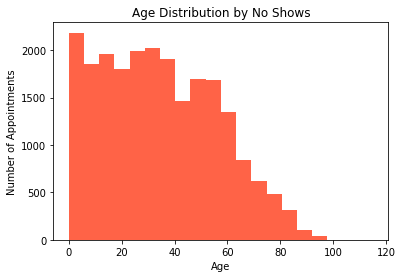

In [74]:
# The plot

plt.hist(age_df_nos, stacked=True, bins=20, color='tomato')
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> Visual distribution of age for all no-shows

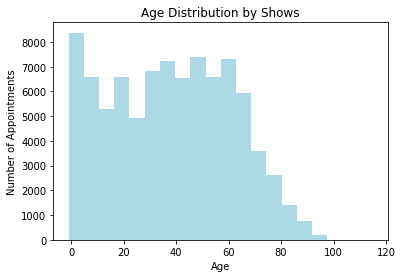

In [75]:
# The plot

plt.hist(age_df_shows, stacked=True, bins=20, color='lightblue')
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> Visual distribution of age for all shows

#### Question 3: What is the patient health designation breakdown of no-shows versus shows?
Identifying potential influencers of appointment no-shows -- health designation

In [76]:
# Total No-Shows
nos_by_health = no_shows.loc[(no_shows.alcoholism == 1) & (no_shows.handicap == 1) & (no_shows.hypertension == 1) & (no_shows.diabetes == 1)]
total_nos = nos_by_health.shape[0]

# Total Shows
shows_by_health = shows.loc[(shows.alcoholism == 1) & (shows.handicap == 1) & (shows.hypertension == 1) & (shows.diabetes == 1)]
total_shows = shows_by_health.shape[0]

# Total Alcoholism
df_alc2 = shows.query('alcoholism == "1"')
dfa2 = df_alc2.shape[0]

# Proportion Alcoholism
a2 = float(dfa2 / total_shows)

# Total Handicap
df_han2 = shows.query('handicap == "1"')
dfb2 = df_han2.shape[0]

# Proportion Handicap
b2 = float(dfb2 / total_shows)

# Total Hypertension
df_hyp2 = shows.query('hypertension == "1"')
dfc2 = df_hyp2.shape[0]

# Proportion Hypertension
c2 = float(dfc2 / total_shows)

# Total Diabetes
df_dia2 = shows.query('diabetes == "1"')
dfd2 = df_dia2.shape[0]

# Proportion Diabetes
d2 = float(dfd2 / total_shows)

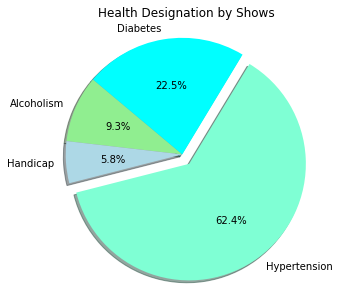

In [77]:
# The plot
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a2, b2, c2, d2]
colors = ['lightgreen', 'lightblue', 'aquamarine', 'cyan']
explode = (0, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Health Designation by Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> Visual distribution of health designations for all shows

In [78]:
# Total Alcoholism
df_alc = no_shows.query('alcoholism == "1"')
dfa = df_alc.shape[0]

# Proportion Alcoholism
a = float(dfa / total_nos)

# Total Handicap
df_han = no_shows.query('handicap == "1"')
dfb = df_han.shape[0]

# Proportion Handicap
b = float(dfb / total_nos)

# Total Hypertension
df_hyp = no_shows.query('hypertension == "1"')
dfc = df_hyp.shape[0]

# Proportion Hypertension
c = float(dfc / total_nos)

# Total Diabetes
df_dia = no_shows.query('diabetes == "1"')
dfd = df_dia.shape[0]

# Proportion Diabetes
d = float(dfd / total_nos)

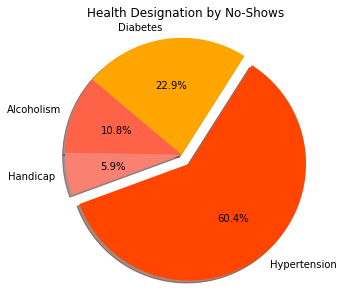

In [79]:
# The plot
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a, b, c, d]
colors = ['tomato', 'salmon', 'orangered', 'orange']
explode = (0, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Health Designation by No-Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> Visual distribution of health designations for all no-shows

#### Question 4: Which neighborhoods have the highest number of no-shows?
Identifying potential influencers of appointment no-shows -- geography

In [80]:
shows_by_hood = shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,neighborhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


> Top 10 neighborhoods by shows

In [81]:
nos_by_hood = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
nos_by_hood.head(10)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


> Top 10 neighborhoods by no-shows

#### Question 5: What is the breakdown of no-shows versus shows by patients that received SMS reminders?
Identifying potential influencers of appointment no-shows -- appointment reminders

In [82]:
# Data to plot

nos_sms_count = no_shows.query('sms_received == 1')
a = nos_sms_count.shape[0]

In [83]:
shows_sms_count = shows.query('sms_received == 1')
b = shows_sms_count.shape[0]

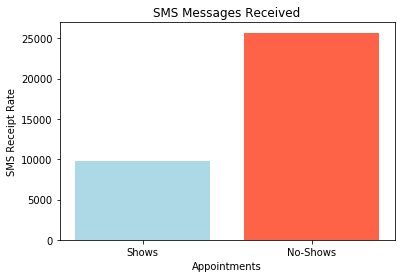

In [84]:
# The plot

locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No-Shows']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['lightblue','tomato'])
plt.title('SMS Messages Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Receipt Rate');

> Visual distribution of appointment status when reminder messages are received

In [85]:
# Data to plot

nos_sms_count = no_shows.query('sms_received == 0')
c_ct = nos_sms_count.shape[0]

shows_sms_count = shows.query('sms_received == 0')
d_ct = shows_sms_count.shape[0]

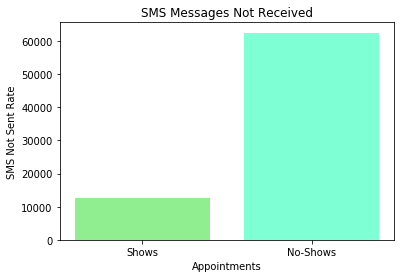

In [86]:
# The plot
locations = [1, 2]
heights = [c_ct, d_ct]
labels = ['Shows', 'No-Shows']

bar2 = plt.bar(locations, heights, tick_label=labels, color=['lightgreen','aquamarine'])
plt.title('SMS Messages Not Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Not Sent Rate');

> Visual distribution of appointment status when reminder messages are not received

#### Question 6: Do no-shows have a larger timeframe between schedule date and appointment date?
Identifying potential influencers of appointment no-shows -- time to appointment

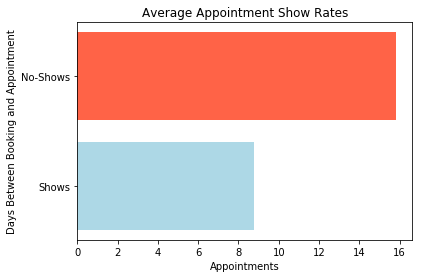

In [87]:
# The plot

locations = [1, 2]
heights = [timeframe_shows, timeframe_nos]
labels = ['Shows', 'No-Shows']

plt.barh(locations, heights, tick_label=labels, color=['lightblue','tomato'])
plt.title('Average Appointment Show Rates')
plt.xlabel('Appointments')
plt.ylabel('Days Between Booking and Appointment');

> Visual distribution of mean timeframe between scheduling and appointment time

#### Question 7: Do appointment no-shows occur on specific days of the week?
Identifying potential influencers of appointment no-shows -- appointment day

In [88]:
# Data to plot

nos_mon = no_shows.query('appointment_dow == "Monday"')
nos_mon = nos_mon['appointment_dow'].count()

nos_tue = no_shows.query('appointment_dow == "Tuesday"')
nos_tue = nos_tue['appointment_dow'].count()

nos_wed = no_shows.query('appointment_dow == "Wednesday"')
nos_wed = nos_wed['appointment_dow'].count()

nos_thu = no_shows.query('appointment_dow == "Thursday"')
nos_thu = nos_thu['appointment_dow'].count()

nos_fri = no_shows.query('appointment_dow == "Friday"')
nos_fri = nos_fri['appointment_dow'].count()

nos_sat = no_shows.query('appointment_dow == "Saturday"')
nos_sat = nos_sat['appointment_dow'].count()

nos_sun = no_shows.query('appointment_dow == "Sunday"')
nos_sun = nos_sun['appointment_dow'].count()

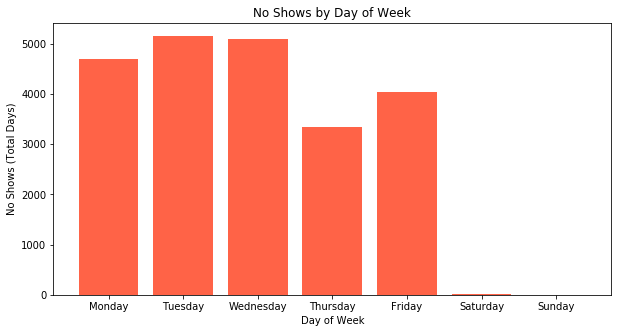

In [89]:
# The plot

locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='tomato')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(10,5);

> Visual distribution of no-shows by day of week

#### Question 8: Are there any trends in appointment no-shows versus shows over time?
Observing trends in appointment show rate

In [90]:
# Dataframe with no_show status

line_df = df.groupby(["appointment_day","no_show"])["no_show"].count().reset_index(name="appt_count")
line_df.head()

,appointment_day,no_show,appt_count
0,2016-04-29,0,2602
1,2016-04-29,1,633
2,2016-05-02,0,3515
3,2016-05-02,1,861
4,2016-05-03,0,3425


In [91]:
# Data to plot

line_df_shows = line_df.query('no_show == "1"')
line_df_shows.groupby("appointment_day").count()
line_df_shows.head()

,appointment_day,no_show,appt_count
1,2016-04-29,1,633
3,2016-05-02,1,861
5,2016-05-03,1,831
7,2016-05-04,1,973
9,2016-05-05,1,807


In [92]:
line_df_nos = line_df.query('no_show == "0"')
line_df_nos.groupby("appointment_day").count()
line_df_nos.head()

,appointment_day,no_show,appt_count
0,2016-04-29,0,2602
2,2016-05-02,0,3515
4,2016-05-03,0,3425
6,2016-05-04,0,3195
8,2016-05-05,0,3466


In [93]:
line_shows_date = line_df_shows['appointment_day']
line_shows_count = line_df_shows['appt_count']

In [94]:
line_nos_date = line_df_nos['appointment_day']
line_nos_count = line_df_nos['appt_count']

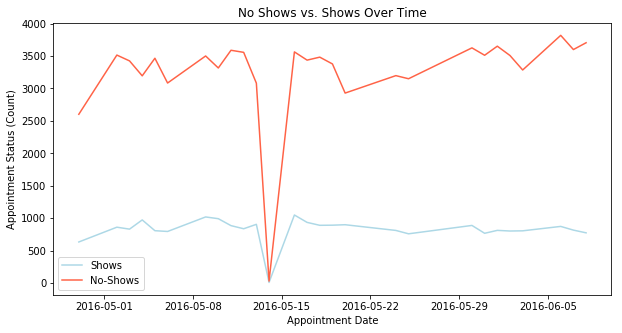

In [95]:
# The plot

line_shows, = plt.plot(line_shows_date, line_shows_count, color='lightblue', label='Shows')
line_nos, = plt.plot(line_nos_date, line_nos_count, color='tomato', label='No-Shows')

plt.title('No Shows vs. Shows Over Time')
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Status (Count)')
plt.legend(handles=[line_shows, line_nos])

fig = plt.gcf()
fig.set_size_inches(10,5);

> Visual of no shows vs. shows over time

<a id='conclusions'></a>
## Conclusions

Nearly 80% of all appointments investigated were no-shows. This number was the root driver of the analysis. The following conclusions were drawn to serve as a basis for a more robust analysis in the future.

#### Limitations:

* The data set explored in this analysis was over a 6 month period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.

* Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.

* The above analyses are mostly two dimensional. More robust multivariate analyses would reveal causation.

* Patients with repeat no-shows would be a good cohort to remove from the analysis to understand environmental or health factors influencing no-shows. This was not done but could improve the integrity of the investigation.

#### Findings:

_What is the patient age distribution of no-shows versus shows?_

* Patient age was charted to see if there was a large difference between the no-shows and shows segments. The mean age of the no-shows segment was 34 compared to the shows segment which was 38. No significant differences to note.

_What is the patient health designation breakdown of no-shows versus shows?_

* Patient health desigations were charted to see if there was a large difference between the no-shows and shows segments. Hypertension was the largest category in both segments due to the popularity of the designation. No  correlations to note.

_Which neighborhoods have the highest number of no-shows?_

* Neighborhood in which the appointment took place was charted to see if certain areas saw higher no-show rates. JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows segments. This is likely due to the population of these neighbhorhoods. It would be worth see if there is any statistical significance in the rate of no shows across different regions.

_What is the breakdown of no-shows versus shows by patients that received SMS reminders?_

* The proportion of no-shows was nearly double when an SMS message was NOT sent to the patient before their appointment day. There is a correlation between SMS messaging and appointment show rate. It would be worth performing additional analyses to understand how strong this correlation is.

_Do no-shows have a larger timeframe between schedule date and appointment date?_

* Timeframe between schedule date and apppointment date was investigated to see if there was any correlation with show rates. The mean timeframe between schedule date and appointment date for no-shows was significantly higher than shows. The show rate was better if the appointment was booked fewer days from the appointment date. There is a correlation between the number of days out and appointment show rate; it would be worth performing additional analyses to understand how strong this correlation is.

_Do appointment no-shows occur on specific days of the week?_

* Appointment no-shows occurred the most on Tuesdays and the least on Thursdays. Overall, appointments early in the week have a higher no-show rate. It's difficult to draw any conclusions from this but could be run through a regression analysis to better understand which other show rate influencer day of week correlates with.

_Are there trends in appointment no-shows versus shows over time?_

* Appointment no-shows are increasing at a higher rate than appointment shows. Performing a regression analysis could provide insight into which factors are impacting appointment show rates the most.

#### Conclusions:

This exploratory analysis was able to correlate time between schedule day and appointment day and appointment reminders with higher appointment show rates. Running statistical analyses on these areas would be a good next step to better understand which of these factors impact appointment show rates the most and hone in on what conditions yield better appointment show rates.

<a id='resources'></a>
## Resources

Markdown
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis

General Pyplot Visualization
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Pie Chart Parameters
https://pythonspot.com/en/matplotlib-pie-chart/

Bar Chart Colors
http://matthiaseisen.com/pp/patterns/p0178/

Conditional Update of Dataframe
https://gist.github.com/pierdom/cab3e44641442cf2c69dc1ead59df0ff

DateTime Function
https://docs.python.org/3/library/datetime.html


In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0